# import

In [1]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED11_data_dict = load_h5(os.path.join(current_working_dir,r"ED11_data.h5"))


dark_pink = '#BE575F'
dark_blue = '#232C56'

# figure D

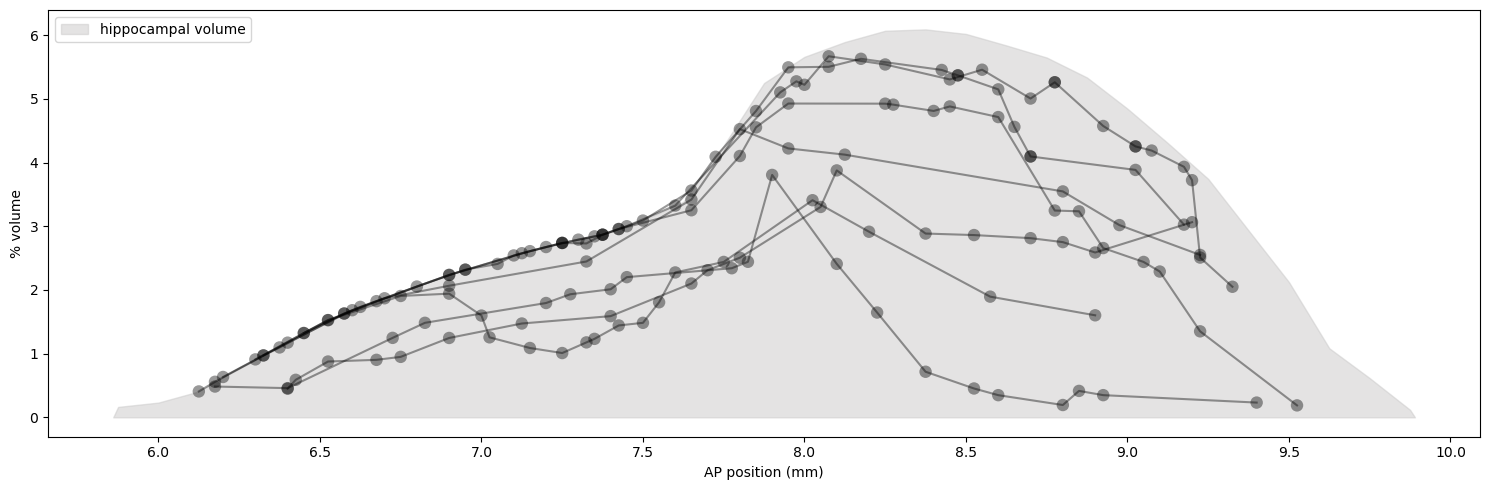

In [2]:
data = ED11_data_dict['lesion_volume']

ref_regions = data["ref_regions"]
ref_percentage_volume = data["ref_percentage_volume"]

all_animals_ap_position = data["all_animals_ap_position"]
all_animals_relative_lesion_pcnt = data["all_animals_relative_lesion_pcnt"]

# animals = data["animals"]
# recordings = set(data["recordings"])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

# Reference hippocampal volume
ax.fill_between(
    ref_regions,
    ref_percentage_volume,
    color="#CAC9C9",
    alpha=0.5,
    label="hippocampal volume"
)

# Per-animal trajectories
for i, y in enumerate(all_animals_relative_lesion_pcnt):
    x = np.array(all_animals_ap_position[i])
    y = np.array(y)

    order = np.argsort(x)
    x = x[order]
    y = y[order]
    
    color_ = "k"
    alpha_ = 0.4

    ax.plot(
        x,
        y,
        linestyle="-",
        linewidth=1.5,
        color=color_,
        alpha=alpha_
    )

    ax.scatter(
        x,
        y,
        s=80,
        c=color_,
        edgecolors="none",
        zorder=2,
        alpha=alpha_
    )

ax.set_xlabel("AP position (mm)")
ax.set_ylabel("% volume")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


# figure E

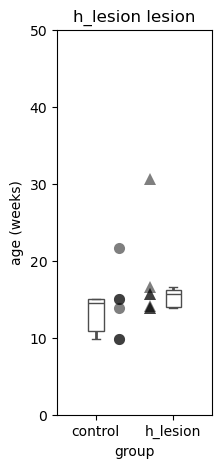

In [3]:
h_lesion_data= ED11_data_dict['h_lesion_data']

plot_lesion_data(h_lesion_data, 'h_lesion')


# figure G

one group has a p of less than 0.05 so is not normally distributed
ShapiroResult(statistic=np.float64(0.852014124509579), pvalue=np.float64(0.16340507094095108))
ShapiroResult(statistic=np.float64(0.9295758278825303), pvalue=np.float64(0.5768301907238372))
so I use non paramteric comparisions test:
RanksumsResult(statistic=np.float64(1.12089707663561), pvalue=np.float64(0.2623316754083572))


C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_61848\3974707614.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('control', 'lesion'), fontsize = 15)


(0.0, 0.8)

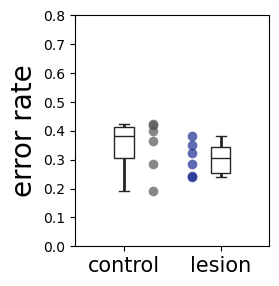

In [4]:

error_rate_df = ED11_data_dict['error_rate_df']

type_ = ['c_error_rate']*len(list(error_rate_df[error_rate_df.group == 'control'].error_rate.values.astype(float))) + ['l_error_rate']*len(list(error_rate_df[error_rate_df.group == 'lesions'].error_rate.values.astype(float)))
scores = list(error_rate_df[error_rate_df.group == 'control'].error_rate.values.astype(float)) + list(error_rate_df[error_rate_df.group == 'lesions'].error_rate.values.astype(float))
plt_df = pd.DataFrame({'group':type_,'score':scores})

fig, ax = plt.subplots(1, 1,figsize=(2.5,3))

color = "#575757"
x = [0.3] *6
ax.plot(x, error_rate_df[error_rate_df.group == 'control'].error_rate.values.astype(float),'o',markersize = 7, c = color, alpha = 0.7,markeredgewidth = 0)

color = "#1C2D90"
x = [0.7] *6
ax.plot(x, error_rate_df[error_rate_df.group == 'lesions'].error_rate.values.astype(float),'o',markersize = 7, c = color,alpha = 0.7,markeredgewidth = 0)


ax=sns.boxplot( y = 'score', x = 'group', data = plt_df, color = "#262D56", width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)

ax.set_xticklabels(('control', 'lesion'), fontsize = 15)
ax.set_xlabel('',size = 20)
ax.set_ylabel('error rate',size = 20)

ax.set_ylim(0,1)

a = error_rate_df[error_rate_df.group == 'control'].error_rate.values.astype(float)
b = error_rate_df[error_rate_df.group == 'lesions'].error_rate.values.astype(float)

print('one group has a p of less than 0.05 so is not normally distributed')
print(scipy.stats.shapiro(a))
print(scipy.stats.shapiro(b))
print('so I use non paramteric comparisions test:')
print(scipy.stats.ranksums(a,b))

ax.set_ylim(0,0.8)


# figure H

(0.0, 15.0)

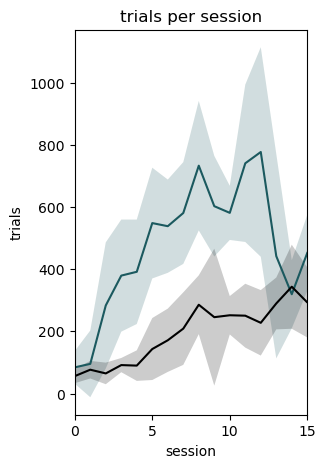

In [5]:
lesion_data = ED11_data_dict['trials_per_session']["lesion_data"]
control_data = ED11_data_dict['trials_per_session']["control_data"]

fig, ax = plt.subplots(1, 1, figsize=(3, 5))

# lesion
l_mean, l_std = [], []
for item in conactinate_nth_items(lesion_data):
    l_mean.append(np.mean(item))
    l_std.append(np.std(item))

ax.plot(l_mean, c="#1B595F")
ax.fill_between(
    range(len(l_mean)),
    np.array(l_mean) - np.array(l_std),
    np.array(l_mean) + np.array(l_std),
    color="#1B595F",
    alpha=0.2,
    edgecolor='None'
)

# control
c_mean, c_std = [], []
for item in conactinate_nth_items(control_data):
    c_mean.append(np.mean(item))
    c_std.append(np.std(item))

ax.plot(c_mean, c="#000000")
ax.fill_between(
    range(len(c_mean)),
    np.array(c_mean) - np.array(c_std),
    np.array(c_mean) + np.array(c_std),
    color='#000000',
    alpha=0.2,
    edgecolor='None'
)

ax.set_title('trials per session')
ax.set_xlabel('session')
ax.set_ylabel('trials')
ax.set_xlim(0, 15)



# figure I

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_61848\3599103809.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'


mean ratios per port: [20.00569936 17.10452748 20.53156696  0.3106761   0.65459946 19.30716042
 21.768485    0.31728524]
SEM per port: [0.77942266 0.92597583 0.63716812 0.07425254 0.20069307 0.7103339
 0.63873997 0.08415903]


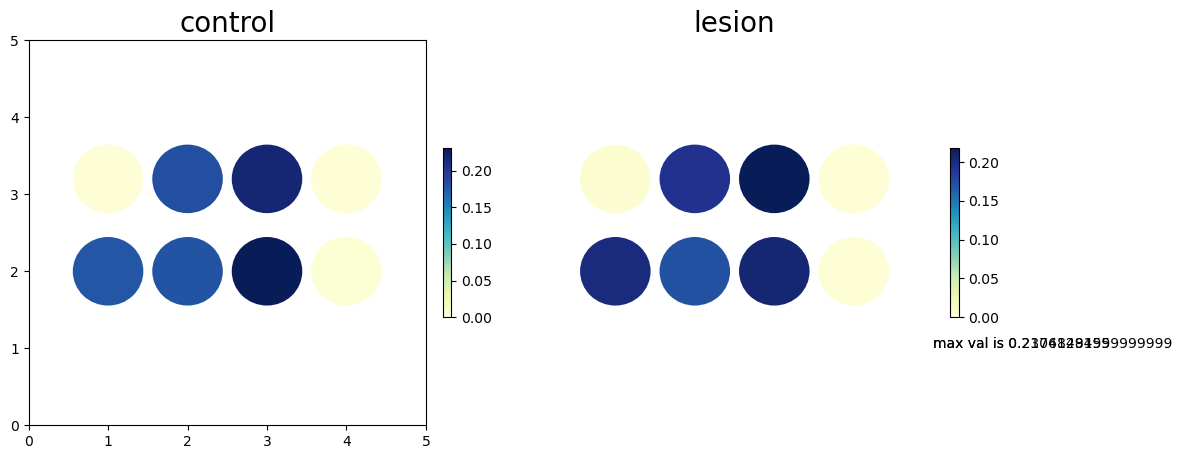

In [6]:
poke_proportions_df = ED11_data_dict['poke_proportions_df']

masks = [poke_proportions_df.group == 'control',poke_proportions_df.group == 'lesions']

nrow = 1 
ncol = 2
fig, axs = plt.subplots(nrow, ncol,figsize=(12, 5))
for ind, ax in enumerate(fig.axes):
    
    mask = masks[ind]

    ax.set_ylim([0, 5])
    ax.set_xlim([0, 5])

    colormap = plt.cm.get_cmap('YlGnBu') # 'plasma' or 'viridis'


    color_vals = [np.mean(poke_proportions_df[mask].p1.values.astype(float)),np.mean(poke_proportions_df[mask].p2.values.astype(float)),np.mean(poke_proportions_df[mask].p3.values.astype(float)),np.mean(poke_proportions_df[mask].p4.values.astype(float)),
                  np.mean(poke_proportions_df[mask].p5.values.astype(float)),np.mean(poke_proportions_df[mask].p6.values.astype(float)),np.mean(poke_proportions_df[mask].p7.values.astype(float)),np.mean(poke_proportions_df[mask].p8.values.astype(float))]

    normalised_colour = np.array(color_vals)/max(color_vals)

    x = [1,2,3,4,1,2,3,4]
    y = [2,2,2,2,3.2,3.2,3.2,3.2]

    circles_ = []
    for i in range(8):
        color_ = colormap(normalised_colour[i])
        circles_ = circles_ + [plt.Circle((x[i], y[i]), 0.4,fill=True, linewidth=5, color = color_)]
    for i in range(8):
        ax.add_artist(circles_[i])

    plt.axis('off')
    ax.set_title(['control', 'lesion'][ind], size=20)

    # sc = plt.scatter(x, y, c=colors)

    smap = plt.cm.ScalarMappable(cmap=colormap)
    smap.set_clim(vmin=0, vmax=max(color_vals))
    plt.text(5,1,('max val is '+ str(max(color_vals))),size=10)

    plt.colorbar(smap,fraction=0.02, pad=0.04,ax = ax)


poke_proportions_df= poke_proportions_df[poke_proportions_df.group == 'lesions']

SEM = [scipy.stats.sem(poke_proportions_df.p1.values.astype(float)),scipy.stats.sem(poke_proportions_df.p2.values.astype(float)),scipy.stats.sem(poke_proportions_df.p3.values.astype(float)),scipy.stats.sem(poke_proportions_df.p4.values.astype(float)),
              scipy.stats.sem(poke_proportions_df.p5.values.astype(float)),scipy.stats.sem(poke_proportions_df.p6.values.astype(float)),scipy.stats.sem(poke_proportions_df.p7.values.astype(float)),scipy.stats.sem(poke_proportions_df.p8.values.astype(float))]

print('mean ratios per port: ' + str(np.array(color_vals)*100))
print('SEM per port: ' + str(np.array(SEM)*100))


# figure J

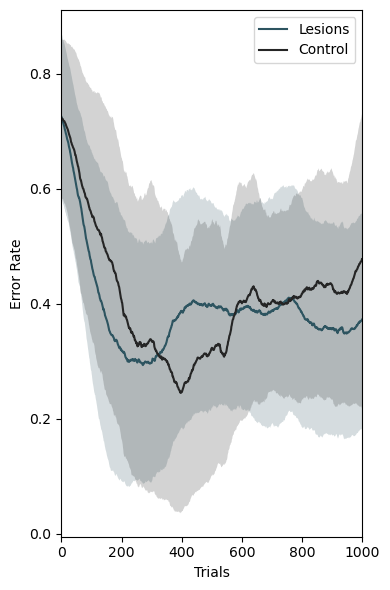

In [7]:

data = ED11_data_dict['error_rate_across']

lesi_av = list(data["lesi_av"])
cont_av = list(data["cont_av"])
xlim = 1000
convolve_window = 100

fig, ax = plt.subplots(figsize=(4, 6))

# ---- LESIONS ----
lesi_mean = np.nanmean(lesi_av, axis=0)
ax.plot(
    convolve_movmean(lesi_mean, convolve_window),
    c="#2D5460",
    label="Lesions",
)

# ---- CONTROL (pad to equal length) ----
max_length = max(len(item) for item in cont_av)
cont_av_padded = [
    np.pad(item, (0, max_length - len(item)), constant_values=np.nan)
    for item in cont_av
]

cont_mean = np.nanmean(cont_av_padded, axis=0)
ax.plot(
    convolve_movmean(cont_mean, convolve_window),
    c="#252525",
    label="Control",
)

def plot_std_region(ax, group_data, color, xlim, convolve_window):
    # Convert list of arrays to padded 2D array
    max_len = max(len(item) for item in group_data)
    group_padded = np.array([np.pad(item, (0, max_len - len(item)), constant_values=np.nan)
                             for item in group_data], dtype=float)
    
    mean_curve = np.nanmean(group_padded, axis=0)
    std_curve = np.nanstd(group_padded, axis=0)
    
    upper = np.clip(mean_curve[:xlim] + std_curve[:xlim], 0, None)
    lower = np.clip(mean_curve[:xlim] - std_curve[:xlim], 0, None)
    
    ax.fill_between(
        range(len(upper)),
        convolve_movmean(lower, convolve_window),
        convolve_movmean(upper, convolve_window),
        color=color,
        alpha=0.2,
        linewidth=0
    )

plot_std_region(ax, lesi_av, "#2D5460",xlim,convolve_window)
plot_std_region(ax, cont_av_padded, "#252525",xlim,convolve_window)

# ---- FORMATTING ----
ax.set_xlim(0, xlim)
ax.set_xlabel("Trials")
ax.set_ylabel("Error Rate")
ax.legend()

plt.tight_layout()
plt.show()

# figure K 

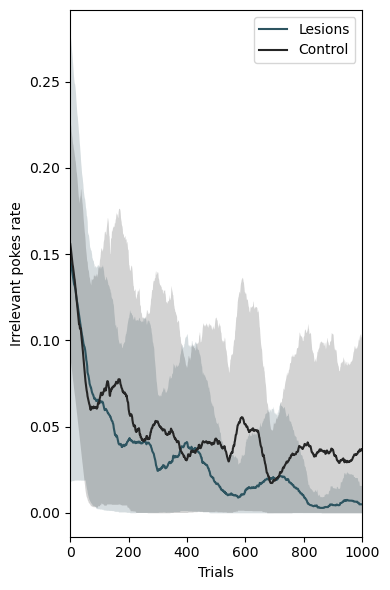

In [8]:

data = ED11_data_dict['irrelevant_pokes_across']

lesi_av = list(data["lesi_av"])
cont_av = list(data["cont_av"])
xlim = 1000
convolve_window = 100

fig, ax = plt.subplots(figsize=(4, 6))

# ---- LESIONS ----
lesi_mean = np.nanmean(lesi_av, axis=0)
ax.plot(
    convolve_movmean(lesi_mean, convolve_window),
    c="#2D5460",
    label="Lesions",
)

# ---- CONTROL (pad to equal length) ----
max_length = max(len(item) for item in cont_av)
cont_av_padded = [
    np.pad(item, (0, max_length - len(item)), constant_values=np.nan)
    for item in cont_av
]

cont_mean = np.nanmean(cont_av_padded, axis=0)
ax.plot(
    convolve_movmean(cont_mean, convolve_window),
    c="#252525",
    label="Control",
)


plot_std_region(ax, lesi_av, "#2D5460",xlim,convolve_window)
plot_std_region(ax, cont_av_padded, "#252525",xlim,convolve_window)

# ---- FORMATTING ----
ax.set_xlim(0, xlim)
ax.set_xlabel("Trials")
ax.set_ylabel("Irrelevant pokes rate")
ax.legend()

plt.tight_layout()
plt.show()


# figure L

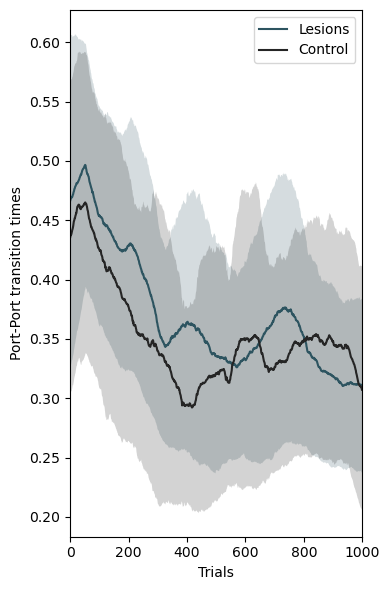

In [9]:
data = ED11_data_dict['port_transits_across']

lesi_av = list(data["lesi_av"])
cont_av = list(data["cont_av"])
xlim = 1000
convolve_window = 100

fig, ax = plt.subplots(figsize=(4, 6))

# ---- LESIONS ----
lesi_mean = np.nanmean(lesi_av, axis=0)
ax.plot(
    convolve_movmean(lesi_mean, convolve_window),
    c="#2D5460",
    label="Lesions",
)

# ---- CONTROL (pad to equal length) ----
max_length = max(len(item) for item in cont_av)
cont_av_padded = [
    np.pad(item, (0, max_length - len(item)), constant_values=np.nan)
    for item in cont_av
]

cont_mean = np.nanmean(cont_av_padded, axis=0)
ax.plot(
    convolve_movmean(cont_mean, convolve_window),
    c="#252525",
    label="Control",
)


plot_std_region(ax, lesi_av, "#2D5460",xlim,convolve_window)
plot_std_region(ax, cont_av_padded, "#252525",xlim,convolve_window)

# ---- FORMATTING ----
ax.set_xlim(0, xlim)
ax.set_xlabel("Trials")
ax.set_ylabel("Port-Port transition times")
ax.legend()

plt.tight_layout()
plt.show()

# figure M

no group has a p of less than 0.05 so they are normally distributed
ShapiroResult(statistic=np.float64(0.9169497699103448), pvalue=np.float64(0.4460745601589504))
ShapiroResult(statistic=np.float64(0.9758510382353521), pvalue=np.float64(0.9291743251520703))
so I use paramteric comparisions test:
TtestResult(statistic=np.float64(-5.503189881632833), pvalue=np.float64(0.0001853442456602816), df=np.float64(11.0))


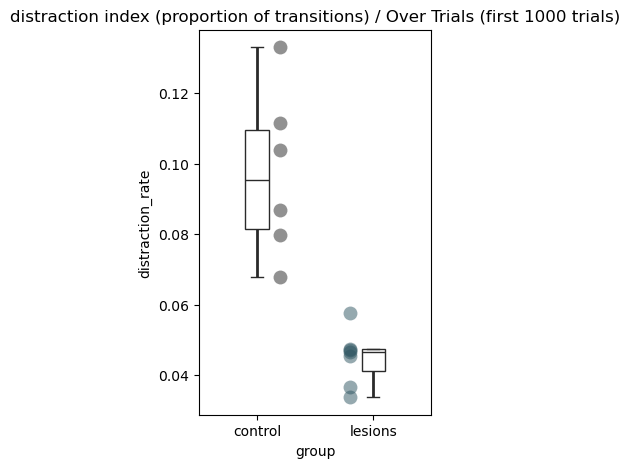

In [10]:

data = ED11_data_dict['distraction_rate']

lesi_av = list(data["lesi_av"])
cont_av = list(data["cont_av"])
group = data['group']



fig, ax = plt.subplots(figsize=(3, 5))

l_means = []
for item in lesi_av:
    l_means += [np.mean(item)]
c_means = []
for item in cont_av:
    c_means += [np.mean(item)]
    
plt.plot(len(l_means) * [0.8], l_means, 'o', c = '#2D5460', alpha = 0.5, markeredgewidth = 0, markersize = 10)
plt.plot(len(c_means) * [0.2], c_means, 'o', c = '#252525', alpha = 0.5, markeredgewidth = 0, markersize = 10)

plt_df = pd.DataFrame({'group':group,'distraction_rate': c_means+l_means})
ax=sns.boxplot( y = 'distraction_rate', x = 'group', data = plt_df, color = '#2D5460', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)
ax.set_title('distraction index (proportion of transitions) / Over Trials (first 1000 trials)')

print('no group has a p of less than 0.05 so they are normally distributed')
print(scipy.stats.shapiro(l_means))
print(scipy.stats.shapiro(c_means))
print('so I use paramteric comparisions test:')
print(scipy.stats.ttest_ind(l_means,c_means))


# figure N

no group has a p of less than 0.05 so they are normally distributed
ShapiroResult(statistic=np.float64(0.7555427780154711), pvalue=np.float64(0.01449236920502948))
ShapiroResult(statistic=np.float64(0.9527389149410267), pvalue=np.float64(0.7623936451429115))
so I use paramteric comparisions test:
TtestResult(statistic=np.float64(-2.1022651078445005), pvalue=np.float64(0.05936702315224242), df=np.float64(11.0))


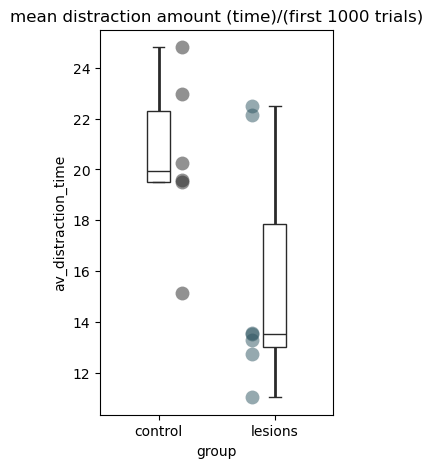

In [11]:
# Load


AA_all_times_distracted = ED11_data_dict['AA_all_times_distracted']
    
fig, ax = plt.subplots(figsize=(3, 5))

l_means = []
c_means = []
for i,item in enumerate(AA_all_times_distracted):
    if group[i] == 'lesions':
        l_means += [np.mean(item)]
    else:
        c_means += [np.mean(item)]

plt.plot(len(l_means) * [0.8], l_means, 'o', c = '#2D5460', alpha = 0.5, markeredgewidth = 0, markersize = 10)
plt.plot(len(c_means) * [0.2], c_means, 'o', c = '#252525', alpha = 0.5, markeredgewidth = 0, markersize = 10)

plt_df = pd.DataFrame({'group':group,'av_distraction_time': c_means+l_means})
ax=sns.boxplot( y = 'av_distraction_time', x = 'group', data = plt_df, color = '#2D5460', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)
ax.set_title('mean distraction amount (time)/(first 1000 trials)')

print('no group has a p of less than 0.05 so they are normally distributed')
print(scipy.stats.shapiro(l_means))
print(scipy.stats.shapiro(c_means))
print('so I use paramteric comparisions test:')
print(scipy.stats.ttest_ind(l_means,c_means))

# figure O

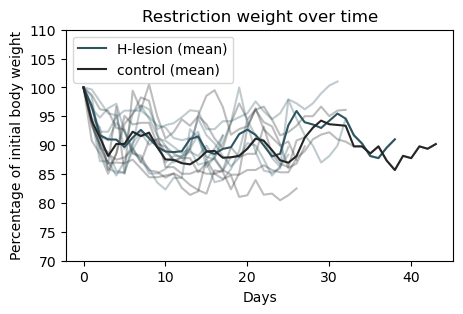

In [12]:
# load in mouse weight data
h_lesion_weights = ED11_data_dict['h_lesion_weights']
animal_groupings = ED11_data_dict['animal_groupings']


fig, ax = plt.subplots(1, 1, figsize=(5, 3))

l_ = []
c_ = []
for df in h_lesion_weights.groupby('mouse'):
    type = animal_groupings.group[np.where(animal_groupings.animal == df[0])[0][0]]
    prcnts = df[1].percentage.values.astype(float)
    if type == 'lesions':
        col = '#2D5460'
        label = 'H-lesion'
        l_ += [prcnts]
    else:
        col = '#252525'
        label = 'control'
        c_ += [prcnts]
    
    ax.plot(prcnts, c = col, alpha = 0.3)

# Plot the mean lines with labels
l_mean = []
for item in conactinate_nth_items(l_):
    l_mean+=[np.mean(item)]
ax.plot(l_mean, c = '#2D5460',label='H-lesion (mean)')

c_mean = []
for item in conactinate_nth_items(c_):
    c_mean+=[np.mean(item)]
ax.plot(c_mean, c = '#252525',label='control (mean)')


ax.set_ylabel('Percentage of initial body weight')
ax.set_xlabel('Days')
ax.set_title('Restriction weight over time')
ax.set_ylim(70, 110)
ax.legend()

# figure P

no group has a p of less than 0.05 so they are normally distributed
ShapiroResult(statistic=np.float64(0.8314744530215642), pvalue=np.float64(0.08263290107720662))
ShapiroResult(statistic=np.float64(0.9721966554456826), pvalue=np.float64(0.9068523389094262))
so I use paramteric comparisions test:
TtestResult(statistic=np.float64(0.7979088054670177), pvalue=np.float64(0.44180844810900965), df=np.float64(11.0))


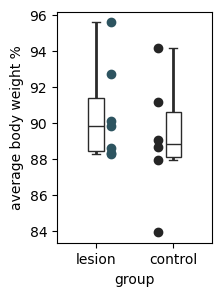

In [13]:

data = ED11_data_dict['body_weight_means']
l_ = list(data["lesion"])
c_ = list(data["control"])

fig, ax = plt.subplots(1, 1, figsize=(2, 3))

l_means = list(np.mean(item[3::]) for item in l_)
c_means = list(np.mean(item[3::]) for item in c_)
ax.plot([0.2]*len(l_means),l_means,'o',c = '#2D5460')
ax.plot([0.8]*len(c_means),c_means,'o',c = '#252525')

plt_df = pd.DataFrame({'group':['lesion']*len(l_means) + ['control']*len(c_means),'average body weight %': l_means+c_means})
ax=sns.boxplot( y = 'average body weight %', x = 'group', data = plt_df, color = '#2D5460', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)


print('no group has a p of less than 0.05 so they are normally distributed')
print(scipy.stats.shapiro(l_means))
print(scipy.stats.shapiro(c_means))
print('so I use paramteric comparisions test:')
print(scipy.stats.ttest_ind(l_means,c_means))

# figure Q

Text(0.5, 1.0, 'Expert vs hlesion')

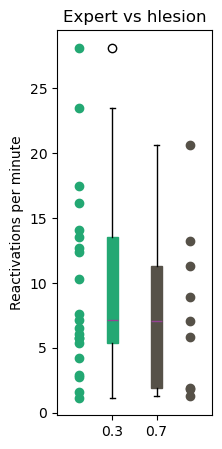

In [14]:
expert_reactivations_per_min = ED11_data_dict['expert']['reactivations_per_min']
hlesion_reactivations_per_min = ED11_data_dict['hlesion']['reactivations_per_min']

fig, ax = plt.subplots(figsize=(2, 5))

ax.plot(np.zeros(len(expert_reactivations_per_min)), expert_reactivations_per_min, 'o', color = '#23A873')
ax.boxplot(expert_reactivations_per_min, positions=[0.3], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#23A873', color='#23A873'), medianprops=dict(color='#934393'))

ax.plot(np.ones(len(hlesion_reactivations_per_min)), hlesion_reactivations_per_min, 'o', color = '#565148')
ax.boxplot(hlesion_reactivations_per_min, positions=[0.7], widths=0.1, patch_artist=True, boxprops=dict(facecolor='#565148', color='#565148'), medianprops=dict(color='#934393'))

ax.set_ylabel('Reactivations per minute')

ax.set_title('Expert vs hlesion')

# figure R

PLOT 2:
Group 1 (NREM):
model p value (f statistic) = 
3.1712640703044366e-09
r2 = 
0.6071427149335138
Group 2 (REM):
model p value (f statistic) = 
3.569632900446949e-05
r2 = 
0.6908297520445896
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2942 2.0000 54.0000 64.7869 0.0000
         Pillai's trace 0.7058 2.0000 54.0000 64.7869 0.0000
 Hotelling-Lawley trace 2.3995 2.0000 54.0000 64.7869 0.0000
    Roy's greatest root 2.3995 2.0000 54.0000 64.7869 0.0000
------------------------------------------------------------
                                                            
------------------------------------------------------------
         groups         Value  Num DF  Den DF F Value Pr > F
-----------------------------

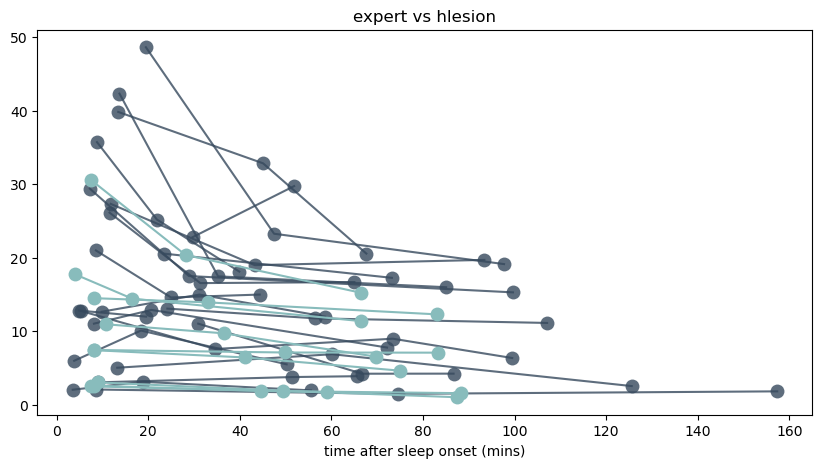

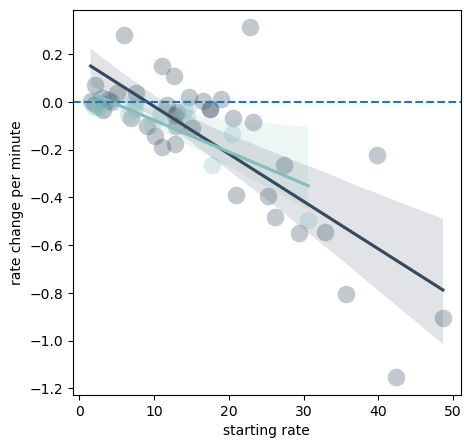

In [15]:
group1_data, group2_data = plot_decay(ED11_data_dict['expert']['binned_rate']  ,ED11_data_dict['expert']['bins_relative_so'],ED11_data_dict['hlesion']['binned_rate']  ,ED11_data_dict['hlesion']['bins_relative_so'], '#36495D','#88BCBC','expert vs hlesion')


###################### STATS
df1 = pd.DataFrame(group1_data)
df2 = pd.DataFrame(group2_data)
# Fit linear regression for Group 1
model_group1 = sm.OLS.from_formula('y ~ x', data=df1).fit()
model_group2 = sm.OLS.from_formula('y ~ x', data=df2).fit()

print('PLOT 2:')
# Print the summary of each model
print("Group 1 (NREM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group1.f_pvalue)
print('r2 = ')
print(model_group1.rsquared)

print("Group 2 (REM):")
# print(model_group1.summary())
print('model p value (f statistic) = ')
print(model_group2.f_pvalue)
print('r2 = ')
print(model_group2.rsquared)


# Combine the data into one DataFrame
data = pd.concat([df1, df2], axis=0)

# Create a grouping variable
groups = np.array(['nrem'] * len(df1) + ['rem'] * len(df2))

# Perform MANOVA
manova = MANOVA.from_formula('x + y ~ groups', data=data)

# Print the MANOVA results
print(manova.mv_test())

# Compute partial eta-squared
eta_squared = compute_partial_eta_squared(manova.mv_test())
print("Partial eta-squared for each effect:", eta_squared)
